<a href="https://colab.research.google.com/github/leo0622nycu/Essay/blob/main/ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 基本資料處理
import pandas as pd
import numpy as np
import os

# 視覺化工具
import matplotlib.pyplot as plt
import seaborn as sns

# 平穩性檢定
from statsmodels.tsa.stattools import adfuller

# 時間序列圖：ACF 和 PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA 模型
from statsmodels.tsa.arima.model import ARIMA

# 模型評估
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSV/TSMC_quarter.csv')
print(df)
print(df.info())

      time      revenue
0   201401  148215172.0
1   201404  183020484.0
2   201407  209049734.0
3   201410  222521075.0
4   201501  222034144.0
5   201504  205439752.0
6   201507  212504909.0
7   201510  203518563.0
8   201601  203498361.0
9   201604  221809846.0
10  201607  260405885.0
11  201610  262227252.0
12  201701  233914400.0
13  201704  213855212.0
14  201707  252107345.0
15  201710  277570284.0
16  201801  248078671.0
17  201804  233276811.0
18  201807  260347882.0
19  201810  289770193.0
20  201901  218704469.0
21  201904  240998475.0
22  201907  293045439.0
23  201910  317237065.0
24  202001  310597183.0
25  202004  310698367.0
26  202007  356426204.0
27  202010  361533057.0
28  202101  362410230.0
29  202104  372145122.0
30  202107  414670379.0
31  202110  438189306.0
32  202201  491075873.0
33  202204  534140808.0
34  202207  613142743.0
35  202210  625531868.0
36  202301  508632973.0
37  202304  480841254.0
38  202307  546732758.0
39  202310  625528856.0
40  202401  5926

In [4]:
# Step 1: 將 `time` 轉換成日期時間格式 (YYYY-MM)
df['time'] = pd.to_datetime(df['time'], format='%Y%m')


# Step 2: 設定 `time` 為索引
df.set_index('time', inplace=True)

# Step 3: 檢查處理後的資料
print("處理後的資料摘要：")
print(df.info())
print("\n前5筆資料：")
print(df.head())

處理後的資料摘要：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2014-01-01 to 2024-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  44 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes
None

前5筆資料：
                revenue
time                   
2014-01-01  148215172.0
2014-04-01  183020484.0
2014-07-01  209049734.0
2014-10-01  222521075.0
2015-01-01  222034144.0


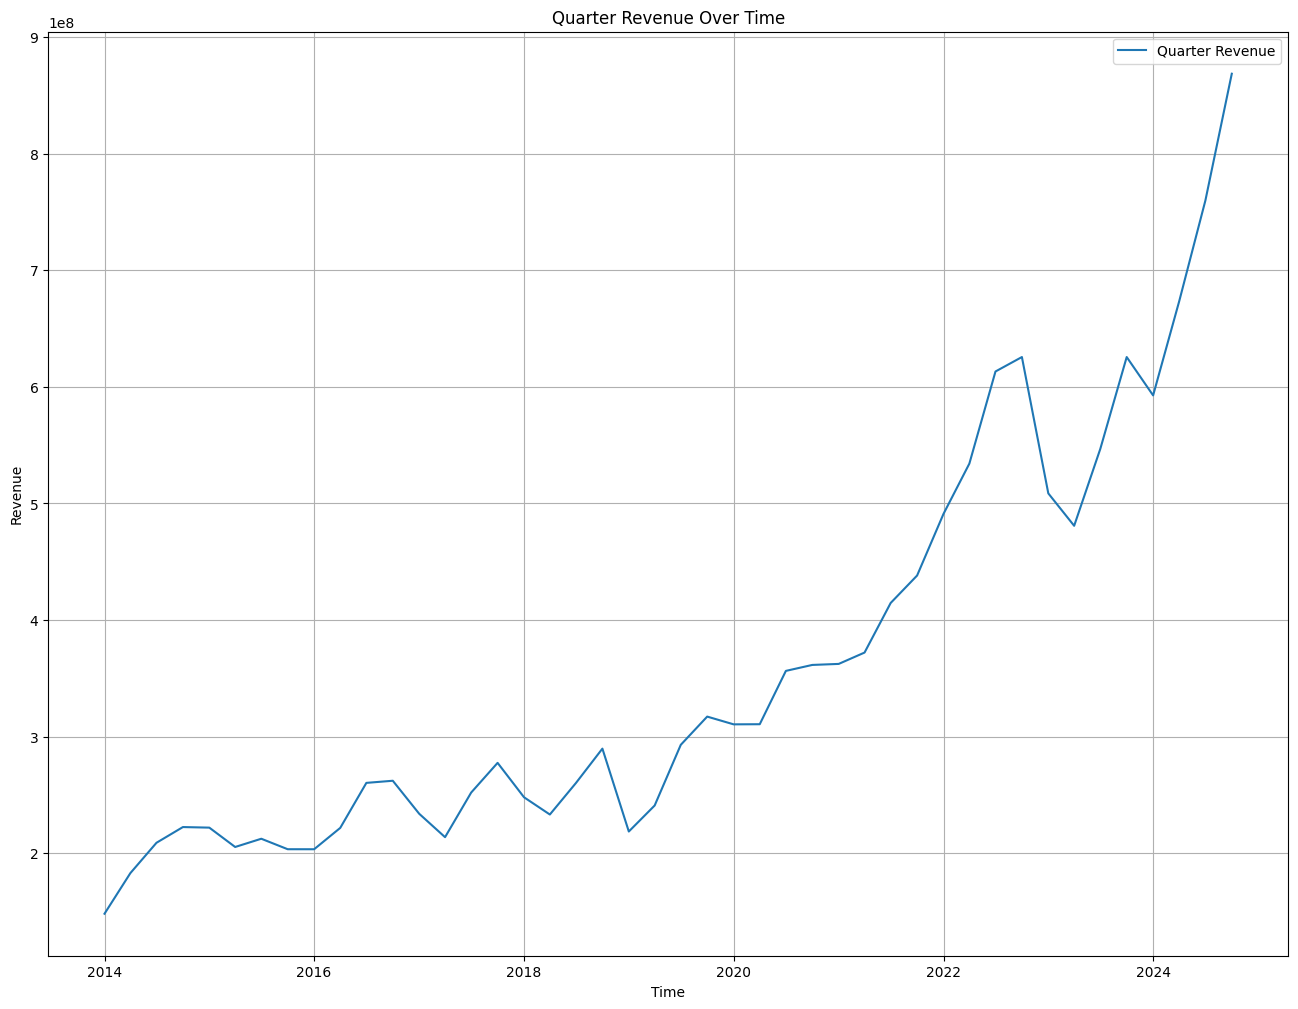

In [5]:
plt.figure(figsize=(16, 12))
plt.plot(df.index, df['revenue'], label='Quarter Revenue', color='tab:blue')
plt.title('Quarter Revenue Over Time')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

In [12]:
!pip install numpy==1.23.5 pmdarima==2.0.3 scikit-learn==1.2.2 statsmodels==0.13.5 --force-reinstall


from pmdarima import auto_arima

# 提取目標值作為單一序列
y = df['revenue']  # 替換為你的目標值欄位名稱

# 使用 auto_arima 找到最佳參數
model = auto_arima(
    y,
    seasonal=False,      # 如果沒有季節性數據，設為 False
    stepwise=True,       # 啟用步進搜尋以加快速度
    trace=True,          # 打印模型的選擇過程
    error_action='ignore',  # 忽略錯誤繼續搜尋
    suppress_warnings=True  # 禁止警告信息
)

# 打印最佳模型參數
print("最佳 ARIMA 模型參數:")
print(model.summary())

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached statsmodels-0.13.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached threadpoolctl-3.6.0-p

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1631.726, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1634.896, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1634.195, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1632.788, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1639.352, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1635.087, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1634.289, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1633.466, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1633.637, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1634.604, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1634.283, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1636.187, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1635.541, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1635.591, Time=0.07 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [7]:

# 確保 DataFrame 的索引是時間格式
#df = df.sort_index()  # 確保數據按時間順序排序

# 假設您要新增的日期與收入
new_date = '2013-10-01'
new_revenue = 145805847

#如果 df 的索引已是 DatetimeIndex，可直接寫：
df.loc[pd.to_datetime(new_date), 'revenue'] = new_revenue

# 若想確保 index 按日期排序，可以再加上：
df.sort_index(inplace=True)

#print(df)

# 分割數據
#train_data = df.iloc[:105] # 前 104 行作為訓練集(加入了2013的資料)
#test_data = df.iloc[105:]   # 剩下的行作為測試集

train_data = df.iloc[:36]
test_data = df.iloc[36:]

# 檢查分割結果
print("訓練集數據:")
print(train_data)
print("\n測試集數據:")
print(test_data)


訓練集數據:
                revenue
time                   
2013-10-01  145805847.0
2014-01-01  148215172.0
2014-04-01  183020484.0
2014-07-01  209049734.0
2014-10-01  222521075.0
2015-01-01  222034144.0
2015-04-01  205439752.0
2015-07-01  212504909.0
2015-10-01  203518563.0
2016-01-01  203498361.0
2016-04-01  221809846.0
2016-07-01  260405885.0
2016-10-01  262227252.0
2017-01-01  233914400.0
2017-04-01  213855212.0
2017-07-01  252107345.0
2017-10-01  277570284.0
2018-01-01  248078671.0
2018-04-01  233276811.0
2018-07-01  260347882.0
2018-10-01  289770193.0
2019-01-01  218704469.0
2019-04-01  240998475.0
2019-07-01  293045439.0
2019-10-01  317237065.0
2020-01-01  310597183.0
2020-04-01  310698367.0
2020-07-01  356426204.0
2020-10-01  361533057.0
2021-01-01  362410230.0
2021-04-01  372145122.0
2021-07-01  414670379.0
2021-10-01  438189306.0
2022-01-01  491075873.0
2022-04-01  534140808.0
2022-07-01  613142743.0

測試集數據:
                revenue
time                   
2022-10-01  625531868.0
2

In [8]:
model = ARIMA(train_data, order=(2, 1, 2))  # p=2, d=1, q=2
model_fit = model.fit()

# 顯示模型摘要
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -651.151
Date:                Mon, 07 Apr 2025   AIC                           1312.302
Time:                        14:10:13   BIC                           1320.078
Sample:                    10-01-2013   HQIC                          1314.986
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1415      0.286      0.494      0.621      -0.420       0.703
ar.L2          0.8560      0.264      3.241      0.001       0.338       1.374
ma.L1         -0.0179      0.635     -0.028      0.9

In [9]:
predictions = []

# Instead of using a list of column names, use the actual 'revenue' data:
history = list(train_data['revenue'])

for t in range(len(test_data)):
    # 1. 用 history(迄今為止) 訓練一個 ARIMA 模型
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit()

    # 2. 預測下一步 (這裡預測1步)
    forecast = model_fit.forecast(steps=1)
    yhat = forecast[0]  # 預測值

    # 3. 記錄預測值
    predictions.append(yhat)

    # 4. 將對應的「實際值」加入 history，模擬滾動前進
    #  Access the actual revenue value from the test data:
    history.append(test_data['revenue'].iloc[t])

In [10]:
print(predictions)

[np.float64(632628119.9372542), np.float64(609194980.9539099), np.float64(502871138.66399294), np.float64(504202694.5474518), np.float64(558482979.557949), np.float64(607399760.3838767), np.float64(571935373.6890287), np.float64(734033934.77909), np.float64(764405647.8274059)]


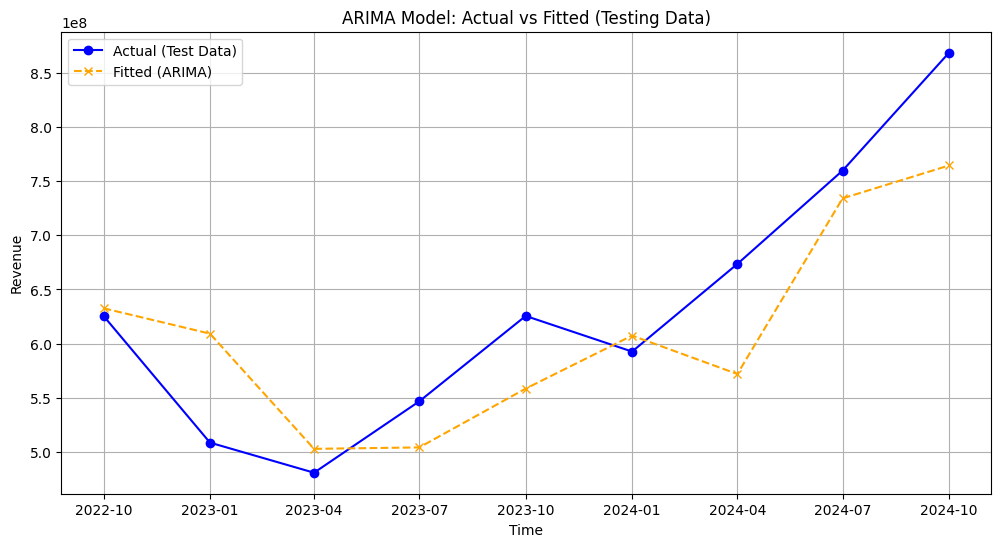

In [11]:
# 假設以下是你的數據和模型
# 訓練數據實際值
actual_test = test_data['revenue']

# 創建 DataFrame 比較實際值和擬合值
comparison = pd.DataFrame({'Actual': actual_test, 'Fitted': predictions}, index=test_data.index)

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual (Test Data)', color='blue', marker='o')
plt.plot(comparison.index, comparison['Fitted'], label='Fitted (ARIMA)', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Model: Actual vs Fitted (Testing Data)')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# 實際值和擬合值
actual = actual_test
fitted = pd.Series(predictions, index=actual.index)

# 計算 RMSE
rmse = np.sqrt(mean_squared_error(actual, fitted))

# 計算 MAE
mae = mean_absolute_error(actual, fitted)

# 計算 MAPE
mape = np.mean(np.abs((actual - fitted) / actual)) * 100

# 輸出結果
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

df_concat_test = pd.concat([actual, fitted], axis=1)
df_concat_test.columns = ['revenue', 'predicted_mean']
print(df_concat_test)

RMSE: 65805614.51
MAE: 53923131.73
MAPE: 8.55%
                revenue  predicted_mean
time                                   
2022-10-01  625531868.0    6.326281e+08
2023-01-01  508632973.0    6.091950e+08
2023-04-01  480841254.0    5.028711e+08
2023-07-01  546732758.0    5.042027e+08
2023-10-01  625528856.0    5.584830e+08
2024-01-01  592644201.0    6.073998e+08
2024-04-01  673510177.0    5.719354e+08
2024-07-01  759692143.0    7.340339e+08
2024-10-01  868461178.0    7.644056e+08


In [13]:
df_concat_test.to_csv('ARIMA_TEST_2.csv', header=True)

from google.colab import files
files.download('ARIMA_TEST_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# 將prediction重新
# 假設有 predictions (list 或 array)，長度是 N
N = len(predictions)

# 建立每日遞增的日期索引，從 2022-09-01 開始，共 N 筆
date_index = pd.date_range(start="2022-10-01", periods=N, freq="3MS")

# 建立 DataFrame，指定剛剛的日期索引
prediction_test = pd.DataFrame(predictions, index=date_index, columns=['revenue'])

print(prediction_test, test_data)

                 revenue
2022-10-01  6.326281e+08
2023-01-01  6.091950e+08
2023-04-01  5.028711e+08
2023-07-01  5.042027e+08
2023-10-01  5.584830e+08
2024-01-01  6.073998e+08
2024-04-01  5.719354e+08
2024-07-01  7.340339e+08
2024-10-01  7.644056e+08                 revenue
time                   
2022-10-01  625531868.0
2023-01-01  508632973.0
2023-04-01  480841254.0
2023-07-01  546732758.0
2023-10-01  625528856.0
2024-01-01  592644201.0
2024-04-01  673510177.0
2024-07-01  759692143.0
2024-10-01  868461178.0


In [15]:
#測試殘差
residuals_test = test_data - prediction_test
residuals_test
print(residuals_test)

                 revenue
time                    
2022-10-01 -7.096252e+06
2023-01-01 -1.005620e+08
2023-04-01 -2.202988e+07
2023-07-01  4.253006e+07
2023-10-01  6.704588e+07
2024-01-01 -1.475556e+07
2024-04-01  1.015748e+08
2024-07-01  2.565821e+07
2024-10-01  1.040555e+08


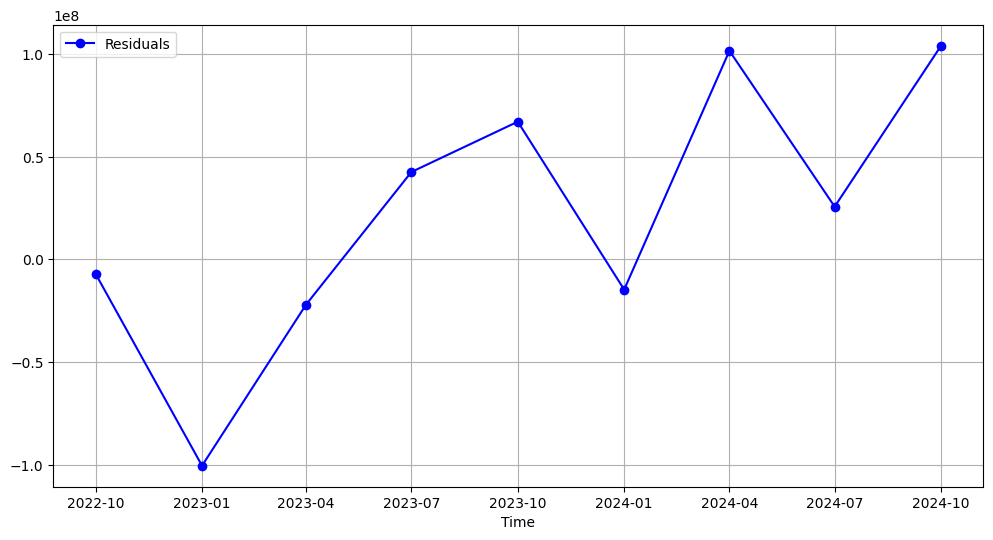

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_test, label='Residuals', color='blue', marker='o')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()

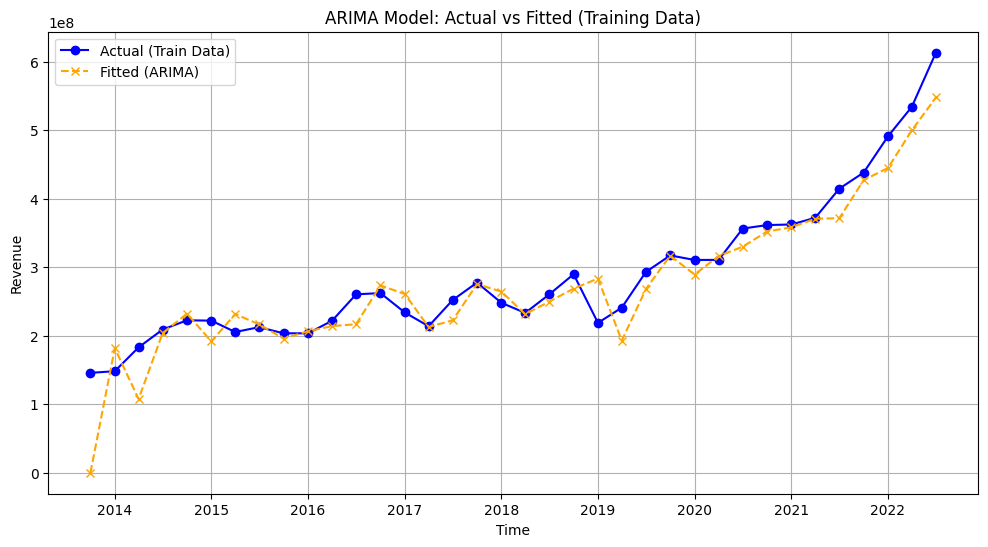

In [17]:

actual_train = train_data['revenue']
# 模擬值（ARIMA 模型對訓練數據的擬合值）
fitted_values_train = model_fit.predict(start=0, end=len(train_data)-1)

# 創建 DataFrame 比較實際值和擬合值
comparison = pd.DataFrame({'Actual': actual_train, 'Fitted': fitted_values_train}, index=train_data.index)

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual (Train Data)', color='blue', marker='o')
plt.plot(comparison.index, comparison['Fitted'], label='Fitted (ARIMA)', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Model: Actual vs Fitted (Training Data)')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print(len(train_data),fitted_values_train )

36 [0.00000000e+00 1.81845374e+08 1.07641612e+08 2.03913642e+08
 2.32150434e+08 1.91679725e+08 2.31564469e+08 2.16531102e+08
 1.95855896e+08 2.06507539e+08 2.14057049e+08 2.16752029e+08
 2.73352849e+08 2.60914648e+08 2.12657223e+08 2.22490578e+08
 2.75403154e+08 2.64416083e+08 2.31357875e+08 2.49875262e+08
 2.68703794e+08 2.83482453e+08 1.92843665e+08 2.67942120e+08
 3.16978641e+08 2.89311241e+08 3.16308957e+08 3.29958285e+08
 3.52113277e+08 3.58261627e+08 3.70795803e+08 3.71534031e+08
 4.27118058e+08 4.44914884e+08 4.99795421e+08 5.47812942e+08]


In [19]:
fitted_train = pd.Series(fitted_values_train, index=train_data.index)
print(fitted_train)

time
2013-10-01    0.000000e+00
2014-01-01    1.818454e+08
2014-04-01    1.076416e+08
2014-07-01    2.039136e+08
2014-10-01    2.321504e+08
2015-01-01    1.916797e+08
2015-04-01    2.315645e+08
2015-07-01    2.165311e+08
2015-10-01    1.958559e+08
2016-01-01    2.065075e+08
2016-04-01    2.140570e+08
2016-07-01    2.167520e+08
2016-10-01    2.733528e+08
2017-01-01    2.609146e+08
2017-04-01    2.126572e+08
2017-07-01    2.224906e+08
2017-10-01    2.754032e+08
2018-01-01    2.644161e+08
2018-04-01    2.313579e+08
2018-07-01    2.498753e+08
2018-10-01    2.687038e+08
2019-01-01    2.834825e+08
2019-04-01    1.928437e+08
2019-07-01    2.679421e+08
2019-10-01    3.169786e+08
2020-01-01    2.893112e+08
2020-04-01    3.163090e+08
2020-07-01    3.299583e+08
2020-10-01    3.521133e+08
2021-01-01    3.582616e+08
2021-04-01    3.707958e+08
2021-07-01    3.715340e+08
2021-10-01    4.271181e+08
2022-01-01    4.449149e+08
2022-04-01    4.997954e+08
2022-07-01    5.478129e+08
dtype: float64


In [20]:
combined = pd.concat([train_data,fitted_train ], axis=1)

# 設定欄位名稱
combined.columns = ['revenue', 'predicted_mean']
df_concat_train = combined[1:]
print(df_concat_train)

                revenue  predicted_mean
time                                   
2014-01-01  148215172.0    1.818454e+08
2014-04-01  183020484.0    1.076416e+08
2014-07-01  209049734.0    2.039136e+08
2014-10-01  222521075.0    2.321504e+08
2015-01-01  222034144.0    1.916797e+08
2015-04-01  205439752.0    2.315645e+08
2015-07-01  212504909.0    2.165311e+08
2015-10-01  203518563.0    1.958559e+08
2016-01-01  203498361.0    2.065075e+08
2016-04-01  221809846.0    2.140570e+08
2016-07-01  260405885.0    2.167520e+08
2016-10-01  262227252.0    2.733528e+08
2017-01-01  233914400.0    2.609146e+08
2017-04-01  213855212.0    2.126572e+08
2017-07-01  252107345.0    2.224906e+08
2017-10-01  277570284.0    2.754032e+08
2018-01-01  248078671.0    2.644161e+08
2018-04-01  233276811.0    2.313579e+08
2018-07-01  260347882.0    2.498753e+08
2018-10-01  289770193.0    2.687038e+08
2019-01-01  218704469.0    2.834825e+08
2019-04-01  240998475.0    1.928437e+08
2019-07-01  293045439.0    2.679421e+08


In [21]:
df_concat_train.to_csv('ARIMA_TRAIN_2.csv', header=True)

from google.colab import files
files.download('ARIMA_TRAIN_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#訓練殘差
residuals_train = actual_train - fitted_train
residuals_train = residuals_train[1:]
N = len(residuals_train)
date_index = pd.date_range(start="2014-01-01", periods=N, freq="3MS")
residuals_train = pd.DataFrame(residuals_train, index=date_index, columns=['revenue'])
print(residuals_train)

                 revenue
2014-01-01 -3.363020e+07
2014-04-01  7.537887e+07
2014-07-01  5.136092e+06
2014-10-01 -9.629359e+06
2015-01-01  3.035442e+07
2015-04-01 -2.612472e+07
2015-07-01 -4.026193e+06
2015-10-01  7.662667e+06
2016-01-01 -3.009178e+06
2016-04-01  7.752797e+06
2016-07-01  4.365386e+07
2016-10-01 -1.112560e+07
2017-01-01 -2.700025e+07
2017-04-01  1.197989e+06
2017-07-01  2.961677e+07
2017-10-01  2.167130e+06
2018-01-01 -1.633741e+07
2018-04-01  1.918936e+06
2018-07-01  1.047262e+07
2018-10-01  2.106640e+07
2019-01-01 -6.477798e+07
2019-04-01  4.815481e+07
2019-07-01  2.510332e+07
2019-10-01  2.584243e+05
2020-01-01  2.128594e+07
2020-04-01 -5.610590e+06
2020-07-01  2.646792e+07
2020-10-01  9.419780e+06
2021-01-01  4.148603e+06
2021-04-01  1.349319e+06
2021-07-01  4.313635e+07
2021-10-01  1.107125e+07
2022-01-01  4.616099e+07
2022-04-01  3.434539e+07
2022-07-01  6.532980e+07


In [23]:
print(residuals_train)
print(residuals_test)
print(type(residuals_test))
print(type(residuals_train))

                 revenue
2014-01-01 -3.363020e+07
2014-04-01  7.537887e+07
2014-07-01  5.136092e+06
2014-10-01 -9.629359e+06
2015-01-01  3.035442e+07
2015-04-01 -2.612472e+07
2015-07-01 -4.026193e+06
2015-10-01  7.662667e+06
2016-01-01 -3.009178e+06
2016-04-01  7.752797e+06
2016-07-01  4.365386e+07
2016-10-01 -1.112560e+07
2017-01-01 -2.700025e+07
2017-04-01  1.197989e+06
2017-07-01  2.961677e+07
2017-10-01  2.167130e+06
2018-01-01 -1.633741e+07
2018-04-01  1.918936e+06
2018-07-01  1.047262e+07
2018-10-01  2.106640e+07
2019-01-01 -6.477798e+07
2019-04-01  4.815481e+07
2019-07-01  2.510332e+07
2019-10-01  2.584243e+05
2020-01-01  2.128594e+07
2020-04-01 -5.610590e+06
2020-07-01  2.646792e+07
2020-10-01  9.419780e+06
2021-01-01  4.148603e+06
2021-04-01  1.349319e+06
2021-07-01  4.313635e+07
2021-10-01  1.107125e+07
2022-01-01  4.616099e+07
2022-04-01  3.434539e+07
2022-07-01  6.532980e+07
                 revenue
time                    
2022-10-01 -7.096252e+06
2023-01-01 -1.005620e+08


In [24]:


# 將兩個 Series 依照索引排序後縱向合併
residuals_all = pd.concat([residuals_train, residuals_test], axis=0)

# 檢查結果
print(residuals_all)
print(len(residuals_all))



                 revenue
2014-01-01 -3.363020e+07
2014-04-01  7.537887e+07
2014-07-01  5.136092e+06
2014-10-01 -9.629359e+06
2015-01-01  3.035442e+07
2015-04-01 -2.612472e+07
2015-07-01 -4.026193e+06
2015-10-01  7.662667e+06
2016-01-01 -3.009178e+06
2016-04-01  7.752797e+06
2016-07-01  4.365386e+07
2016-10-01 -1.112560e+07
2017-01-01 -2.700025e+07
2017-04-01  1.197989e+06
2017-07-01  2.961677e+07
2017-10-01  2.167130e+06
2018-01-01 -1.633741e+07
2018-04-01  1.918936e+06
2018-07-01  1.047262e+07
2018-10-01  2.106640e+07
2019-01-01 -6.477798e+07
2019-04-01  4.815481e+07
2019-07-01  2.510332e+07
2019-10-01  2.584243e+05
2020-01-01  2.128594e+07
2020-04-01 -5.610590e+06
2020-07-01  2.646792e+07
2020-10-01  9.419780e+06
2021-01-01  4.148603e+06
2021-04-01  1.349319e+06
2021-07-01  4.313635e+07
2021-10-01  1.107125e+07
2022-01-01  4.616099e+07
2022-04-01  3.434539e+07
2022-07-01  6.532980e+07
2022-10-01 -7.096252e+06
2023-01-01 -1.005620e+08
2023-04-01 -2.202988e+07
2023-07-01  4.253006e+07


In [26]:
# 將 Series 輸出為 CSV 檔案
residuals_all.name = 'residual'
residuals_all.to_csv('residuals_all_2.csv', header=True)

from google.colab import files
files.download('residuals_all_2.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>